## Import libraries

I'll import datetime to handle year, numpy to work with arrays and pandas to read in the dataset files, matplotlib & seaborn for plotting and sklearn for various machine learning models.

In [3]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## Reading datasets

I'll read the dataset and get information about it.

In [4]:
df=pd.read_csv("C:\\Users\\rashi\\Downloads\\C_E_2022.csv")

pd.pandas.set_option('display.max_columns',None)

df.head(10)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2

Let's first split the dataset into train and test datasets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], 
                                                    df.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 807 to 1126
Columns: 140 entries, Unnamed: 0 to Battery
dtypes: float64(6), int64(1), object(133)
memory usage: 983.7+ KB


## Index
The first column is the index for each data point and hence we can simply remove it.

In [28]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

## Name
Let's explore the various cars in the dataset.

In [29]:
X_train["Make"].value_counts()

Maruti Suzuki       104
Hyundai              89
Mahindra             82
Tata                 67
Toyota               58
Honda                45
Renault              30
Ford                 29
Skoda                28
Volkswagen           27
Bmw                  24
Land Rover Rover     23
Nissan               20
Audi                 19
Jeep                 18
Jaguar               17
Kia                  16
Fiat                 16
Volvo                13
Datsun               12
Lamborghini          10
Porsche              10
Mg                    9
Icml                  9
Maruti Suzuki R       9
Land Rover            6
Force                 6
Mini                  6
Ferrari               6
Lexus                 6
Maserati              4
Bentley               3
Isuzu                 3
Aston Martin          3
Premier               3
Mitsubishi            3
Bajaj                 1
Bugatti               1
Dc                    1
Name: Make, dtype: int64

As it appears, there are several cars in the dataset, some of them with a count higher than 1. Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [30]:
make_train = X_train["Make"].str.split(" ", expand = True)
make_test = X_test["Make"].str.split(" ", expand = True)

In [31]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

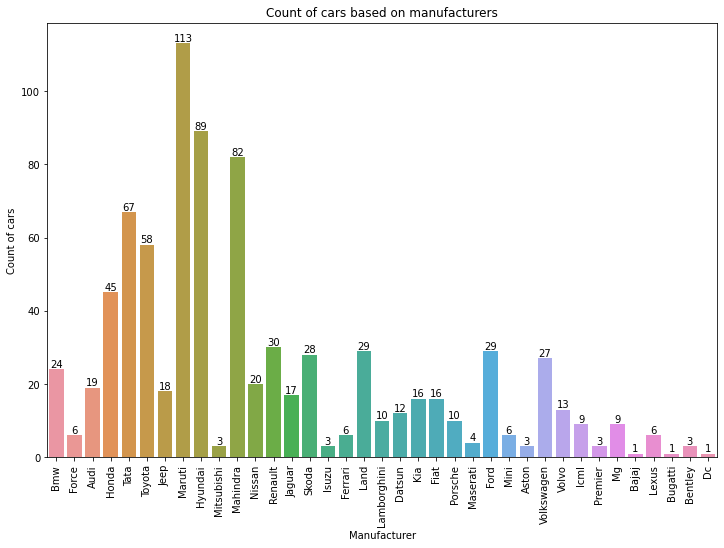

In [32]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer Maruti and there are no null values.

I'll also drop the Make column.

In [33]:
X_train.drop("Make", axis = 1, inplace = True)
X_test.drop("Make", axis = 1, inplace = True)

## Exploring Fuel Feature


c:\Users\rashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


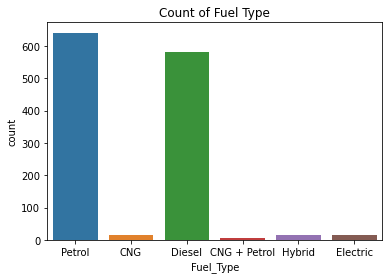

In [34]:
# let's see the variation of fuel type

sns.countplot(df.Fuel_Type)
plt.title("Count of Fuel Type")
plt.show()

Maximum cars in the dataset use Petrol.

In [26]:
df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].str.replace(',', '')
df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].str.replace('Rs', '')
df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].str.replace('.', '')
df['Ex_Showroom_Price']

C:\Users\rashi\AppData\Local\Temp/ipykernel_7860/3448755142.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Ex_Showroom_Price'] = df['Ex_Showroom_Price'].str.replace('.', '')


0         292667
1         236447
2         296661
3         334768
4         272223
          ...   
1271     1302000
1272     1421000
1273     1431000
1274     1201000
1275     6862560
Name: Ex_Showroom_Price, Length: 1276, dtype: object

## Mileage

In [37]:
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace('?', '')
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace('km', '')
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace('/', '')
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace('litre', '')
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(',', '')
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace('pl', '')
df['ARAI_Certified_Mileage']

C:\Users\rashi\AppData\Local\Temp/ipykernel_7396/222171043.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace('?', '')


0        23.6 
1        23.6 
2          NaN
3        21.9 
4        23.6 
         ...  
1271     25.1 
1272     25.1 
1273     22.6 
1274     17.8 
1275    11.56 
Name: ARAI_Certified_Mileage, Length: 1274, dtype: object

In [38]:
print(sum(X_train["ARAI_Certified_Mileage"].isnull()))
print(sum(X_test["ARAI_Certified_Mileage"].isnull()))

84
30


In [19]:
df.drop([353], axis=0, inplace=True)

df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,292667,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance 

In [54]:
df.drop([304, 353], axis=0, inplace=True)

df

,Unnamed: 0,Make,Model,Variant,Ex_Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,292667,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,385500,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447,624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,385500,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance whichever c.

c:\Users\rashi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


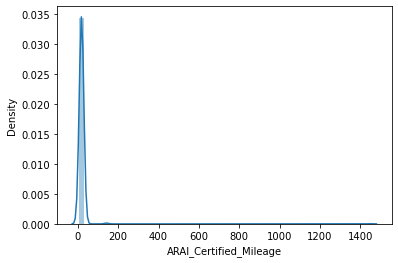

In [55]:
sns.distplot(df.ARAI_Certified_Mileage)
plt.show()

## Exploring Engine Feature

c:\Users\rashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


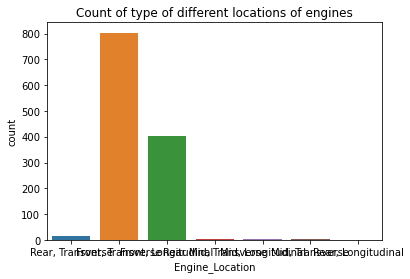

In [40]:
# let's see the variation of Displacement locations

sns.countplot(df.Engine_Location)
plt.title("Count of type of different locations of engines")
plt.show()

As we can the engine location, Front and Transverse has the most number of counts, which clearly depicts that it is used in most of the cars.

In [43]:
df[["Engine_Location", "Ex-Showroom_Price"]].corr()

""


As we can see that Engine_Location does not affect the showroom price at all.

## Exploring Target Feature

In [5]:
df.rename(columns = {'Ex-Showroom_Price' : 'Ex_Showroom_Price'}, inplace = True)

c:\Users\rashi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


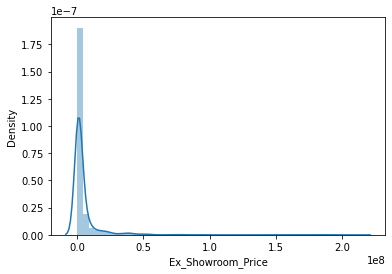

In [49]:
# let's look at the data distribution of Ex_Showroom_Price

sns.distplot(df.Ex_Showroom_Price)
plt.show()

Ex_Showroom_Price data are distributed in righ skewed, there may be chance of outliers let's try to find it.

In [50]:
df.Ex_Showroom_Price.describe()

count        1274
unique       1177
top        999900
freq           14
Name: Ex_Showroom_Price, dtype: object

## Displacement, Power and Seats
The Displacement values are defined in CC so I need to remove CC from the data. Similarly, Power has PS@rpm, so I'll remove PS@rpm from it. Also, as there are missing values in Displacement, Power and Seating_Capacity, I'll again replace them with the mean.

In [8]:
cc_train = X_train["Displacement"].str.split(" ", expand = True)
cc_test = X_test["Displacement"].str.split(" ", expand = True)
X_train["Displacement"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Displacement"] = pd.to_numeric(cc_test[0], errors = 'coerce')


In [11]:
bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)

In [9]:
df['Power'] = df['Power'].str.replace('PS', '')
df['Power'] = df['Power'].str.replace('@', '')
df['Power'] = df['Power'].str.replace('rpm', '')
df['Power']

0          385500
1          385500
2          385500
3          385500
4          385500
          ...    
1271      1003600
1272      1003600
1273      1196600
1274      1196600
1275    202ps3800
Name: Power, Length: 1276, dtype: object

## Warranty
We will see the relation between Warranty period and Ex_Showroom_Price.

Text(0.5, 1.0, 'Car Price vs WarrantyPeriod')

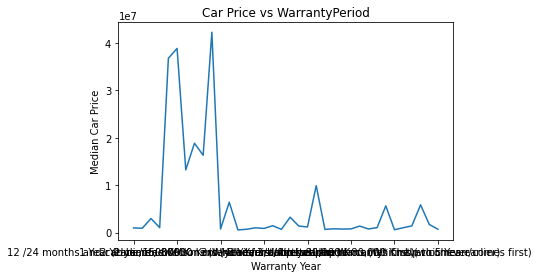

In [19]:
df.groupby('Extended_Warranty')['Ex-Showroom_Price'].median().plot()
plt.xlabel('Warranty Year')
plt.ylabel('Median Car Price')
plt.title("Car Price vs WarrantyPeriod")

## Discrete Feature

In [7]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,Unnamed: 0,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,USB_Ports
0,0,2.0,2.0,5.0,4.0,NaN,NaN
1,1,2.0,2.0,5.0,4.0,NaN,NaN
2,2,2.0,2.0,4.0,4.0,NaN,NaN
3,3,2.0,2.0,5.0,4.0,NaN,NaN
4,4,2.0,2.0,5.0,4.0,NaN,NaN


In [8]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Wr' in feature or 'Warranty' in feature]

year_feature

[]

In [9]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Unnamed: 0']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [23]:
discrete_feature

['Cylinders',
 'Valves_Per_Cylinder',
 'Doors',
 'Seating_Capacity',
 'Number_of_Airbags',
 'USB_Ports']

Now we will see that whether these discrete features affect our Showroom Prices or not.

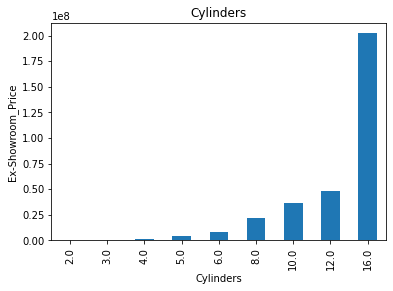

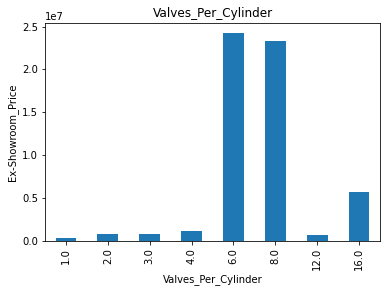

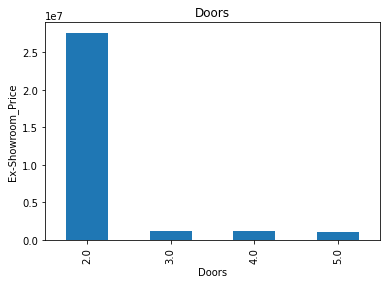

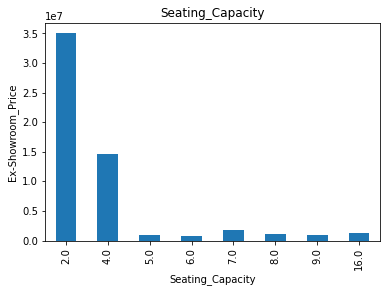

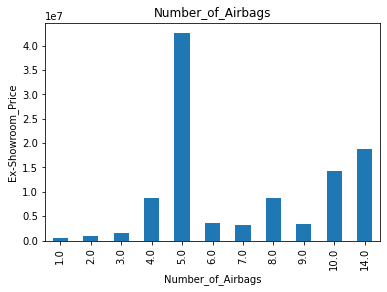

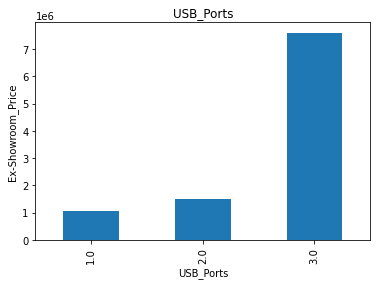

In [24]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['Ex-Showroom_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Ex-Showroom_Price')
    plt.title(feature)
    plt.show()

We just saw how much each discrete feature is affected by Ex-Showroom_Price.

In [11]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 1


## Categorical Variables

In [18]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Make',
 'Model',
 'Variant',
 'Ex_Showroom_Price',
 'Displacement',
 'Drivetrain',
 'Cylinder_Configuration',
 'Emission_Norm',
 'Engine_Location',
 'Fuel_System',
 'Fuel_Tank_Capacity',
 'Fuel_Type',
 'Height',
 'Length',
 'Width',
 'Body_Type',
 'City_Mileage',
 'Highway_Mileage',
 'ARAI_Certified_Mileage',
 'ARAI_Certified_Mileage_for_CNG',
 'Kerb_Weight',
 'Gears',
 'Ground_Clearance',
 'Front_Brakes',
 'Rear_Brakes',
 'Front_Suspension',
 'Rear_Suspension',
 'Front_Track',
 'Rear_Track',
 'Front_Tyre_&_Rim',
 'Rear_Tyre_&_Rim',
 'Power_Steering',
 'Power_Windows',
 'Power_Seats',
 'Keyless_Entry',
 'Power',
 'Torque',
 'Odometer',
 'Speedometer',
 'Tachometer',
 'Tripmeter',
 'Seats_Material',
 'Type',
 'Wheelbase',
 'Wheels_Size',
 'Start_/_Stop_Button',
 '12v_Power_Outlet',
 'Audiosystem',
 'Aux-in_Compatibility',
 'Average_Fuel_Consumption',
 'Basic_Warranty',
 'Bluetooth',
 'Boot-lid_Opener',
 'Boot_Space',
 'CD_/_MP3_/_DVD_Player',
 'Central_Locking',
 'Child_Safety_Locks',

In [20]:
df[categorical_features].head()

,Make,Model,Variant,Ex_Showroom_Price,Displacement,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,NaN,NaN,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,Fabric,Manual,2230 mm,4 B X 12,NaN,Yes,Not on offer,NaN,Yes,2 years /75000 Kms (years/distance whichever c...,NaN,Internal,110 litres,NaN,NaN,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (ye

In [22]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Make and number of categories are 40
The feature is Model and number of categories are 263
The feature is Variant and number of categories are 1064
The feature is Ex_Showroom_Price and number of categories are 1179
The feature is Displacement and number of categories are 130
The feature is Drivetrain and number of categories are 5
The feature is Cylinder_Configuration and number of categories are 5
The feature is Emission_Norm and number of categories are 5
The feature is Engine_Location and number of categories are 8
The feature is Fuel_System and number of categories are 3
The feature is Fuel_Tank_Capacity and number of categories are 64
The feature is Fuel_Type and number of categories are 6
The feature is Height and number of categories are 212
The feature is Length and number of categories are 228
The feature is Width and number of categories are 183
The feature is Body_Type and number of categories are 18
The feature is City_Mileage and number of categories are 165

## Multivariate Analysis

c:\Users\rashi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


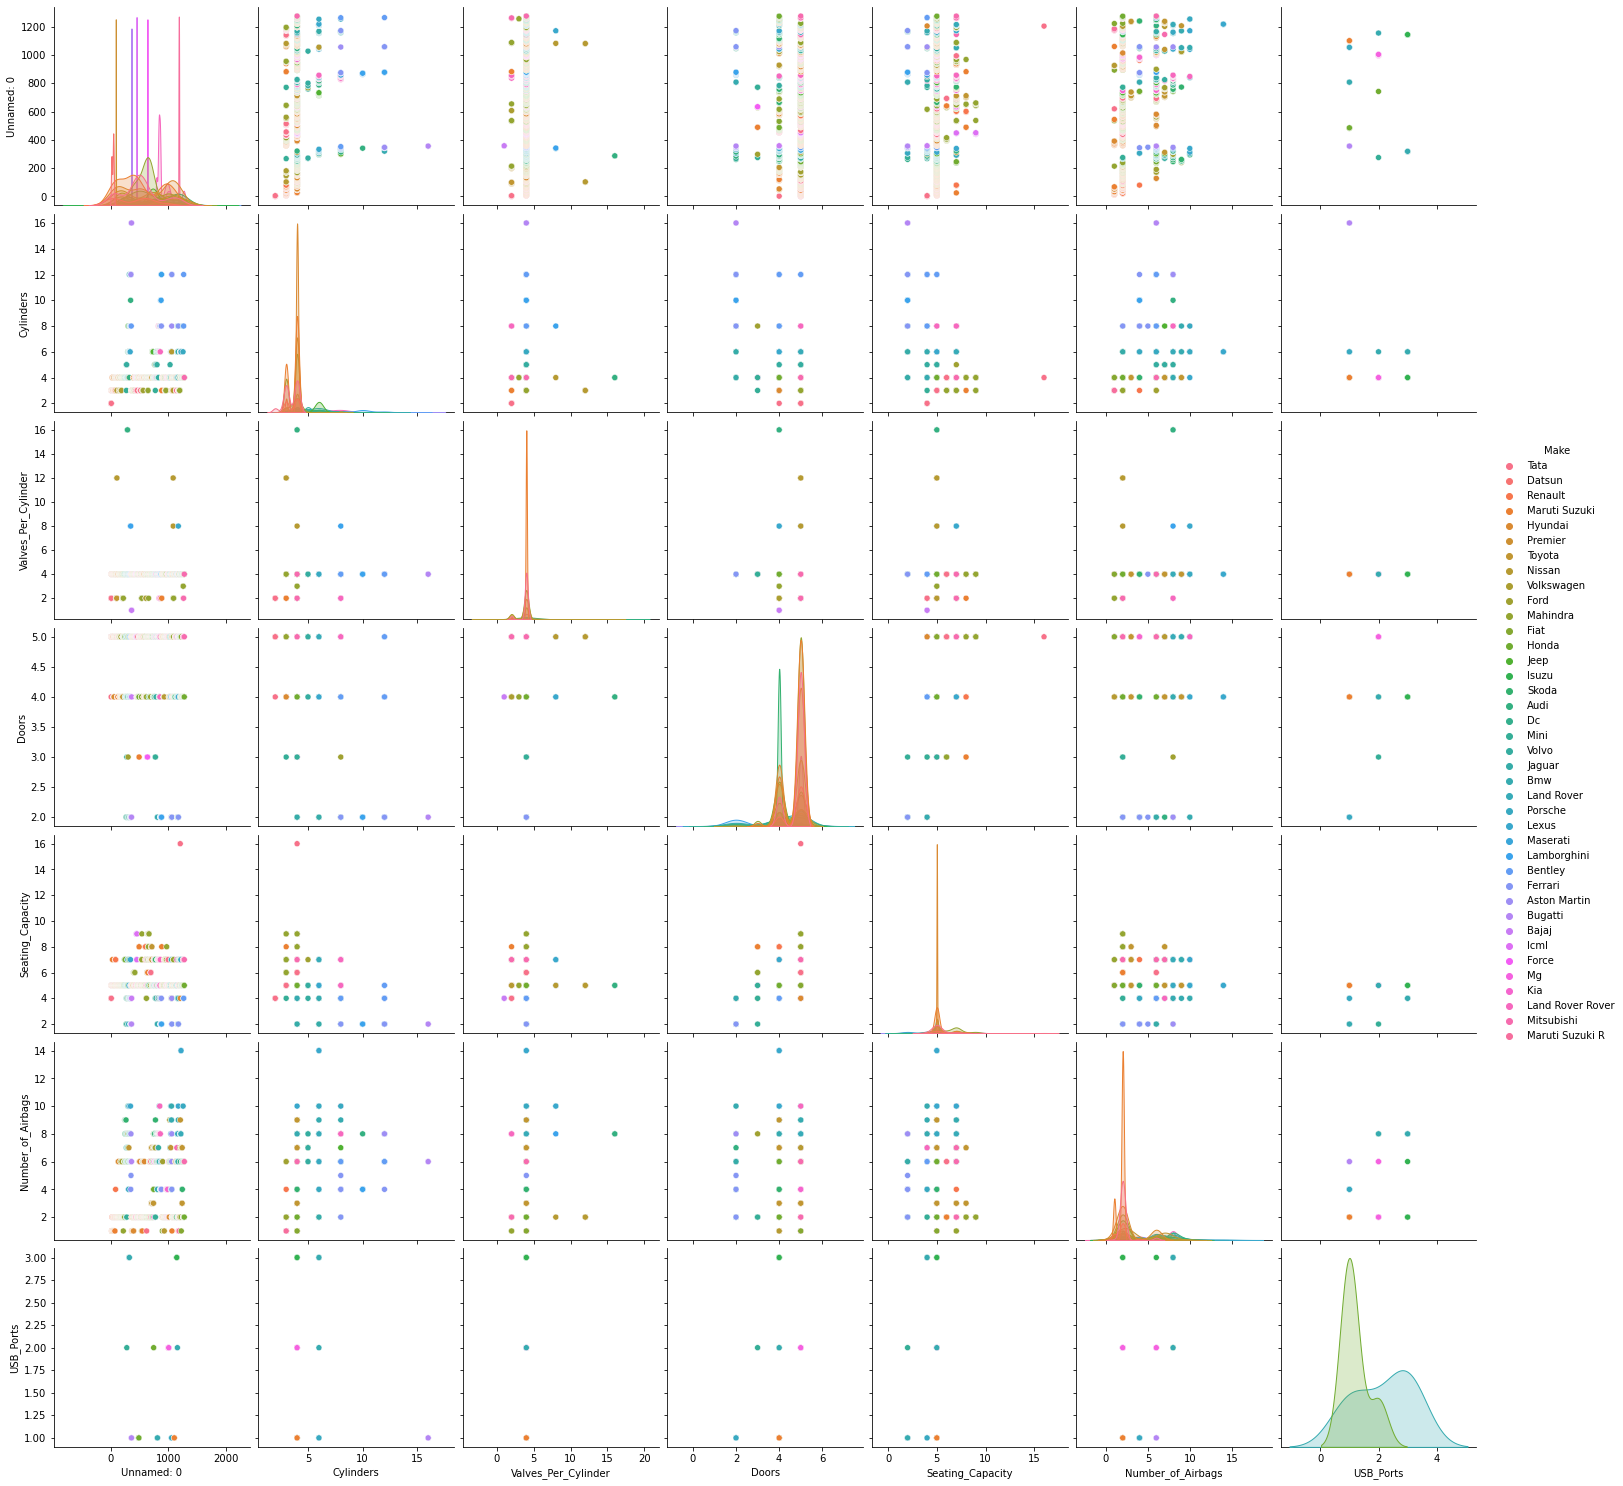

In [28]:
sns.pairplot(df,hue="Make",size=3)